<a href="https://colab.research.google.com/github/nedokormysh/GB_intro_NN/blob/lesson2/GB_NN_intro_hw_2_dirty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 1.

Попробуйте обучить, нейронную сеть на Keras(рассмотренную на уроке) на датасете MNIST с другими параметрами. Опишите в комментарии к уроку - какой результата вы добились от нейросети? Что помогло вам улучшить ее точность?
Поработайте с документацией Keras. Попробуйте найти полезные команды Keras неразобранные на уроке.

In [269]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [318]:
import numpy as np
import keras
import matplotlib.pyplot as plt

import tensorflow.keras as keras
from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [271]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Label is 1
Label is 8
Label is 4


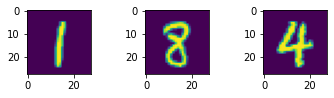

In [272]:
for i in range(3):
  ind = np.random.randint(0, train_images.shape[0])
  plt.subplot(330 + 1 + i)
  plt.imshow(train_images[ind])
  print(f'Label is {train_labels[ind]}')

In [273]:
# Normalize the images.
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

# Flatten the images.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

print(train_images.shape) # (60000, 784)
print(test_images.shape)

(60000, 784)
(10000, 784)


In [274]:
input_size = train_images.shape[1]
# print(input_size)

In [275]:
def test_nn(train_images,
            y_train,
            test_images,
            y_test,
            n_layers: int = 2,
            n1_neuron: int = 64,
            n2_neuron: int = 64,
            optimizer: str = 'adam',
            n_epochs: int = 5,
            batch_size: int = 32,
            validation_split: float = 0.2,
            verbose=True):
  

  # Build the model.

  model = Sequential()
  model.add(Dense(n1_neuron, input_shape=(input_size,), activation='relu'))
  # model.add(Dense(n2_neuron, activation='tanh'))
  # Если хотим хотим увеличить количество слоёв больше двух, то будем добавлять 
  if n_layers > 2: 
    for k in range(n_layers-2):
      model.add(Dense(n2_neuron, activation='tanh'))

  # выходной слой.
  model.add(Dense(10, activation='softmax'))


  # Compile the model.
  model.compile(
  optimizer=optimizer,
  loss='categorical_crossentropy',
  metrics=['accuracy'],
  )

  # Train the model.
  history = model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=n_epochs,
  batch_size=batch_size,
  validation_split=validation_split,
  verbose=verbose
  )

  # Evaluate the model.
  model.evaluate(
  test_images,
  to_categorical(test_labels)
  )

  return history.history

In [276]:
# test_nn(train_images, train_labels, test_images, test_labels, n1_neuron=2)

In [277]:
def nn_test(train_images,
            y_train,
            test_images,
            y_test,
            n1_neuron: int = 64,
            n2_neuron: int = 64,
            n_layers: int = 2,  # здесь учитываем количество вместе с входным слоем
            optimizer: str = 'adam',
            n_epochs: int = 15,
            batch_size: int = 32,
            validation_split: float = 0.2,
            verbose=True):
  

#   model = Sequential([
#   Dense(64, activation='relu', input_shape=(784,)),
#   # Dense(64, activation='relu'),
#   Dense(10, activation='softmax'),
# ])
    # Build the model. 
    # Входной слой. Поносвязный слой из нейронов с активацией ReLU
    model = Sequential()
    model.add(Dense(n1_neuron, activation='relu', input_shape=input_size,))

    # # Если хотим хотим увеличить количество слоёв больше двух, то будем добавлять 
    # if n_layers > 2:  # добавление скрытых слоев
    #     for k in range(n_layers-2):
    #         model.add(Dense(n2_neuron, activation='tanh'))

    # выходной слой.
    model.add(Dense(10, activation='softmax'))
    


    # # Compile the model.
    # model.compile(
    # optimizer='adam',
    # loss='categorical_crossentropy',
    # metrics=['accuracy'],
    # )

    # скомпилируем модель
    model.compile(
    optimizer=optimizer,  # оптимизатор
    loss='categorical_crossentropy',
    metrics=['accuracy'],  # метрика
    )



#     model.fit(
#   train_images,
#   to_categorical(train_labels),
#   epochs=5,
#   batch_size=32,
# )

    history = model.fit(
              train_images,
              y_train,
              epochs=n_epochs,
              batch_size=batch_size,
              validation_split=validation_split,
              verbose=verbose)

    model.evaluate(test_images, y_test)

    # print(history.history)
    return history.history
    

## **Проверка обучения с разным количеством нейронов скрытого слоя**

In [278]:
res_dict={}
x = np.linspace(1, 20, 20)
for n_neurons in [2, 4, 8, 32, 96, 192]:
    res_dict[n_neurons] = test_nn(train_images, train_labels, test_images, test_labels,
                                   n1_neuron=n_neurons,
                                   n2_neuron=None,
                                   n_layers=2,
                                   optimizer='adam',
                                   n_epochs=20,
                                   batch_size=128,
                                   validation_split=0.2,
                                   verbose=False)

313/313 [==============================] - 1s 2ms/step - loss: 0.0813 - accuracy: 0.9752


In [279]:
# print(len(res_dict[2]['loss']))

In [280]:
# for n_neur in res_dict:
#   print(n_neur)

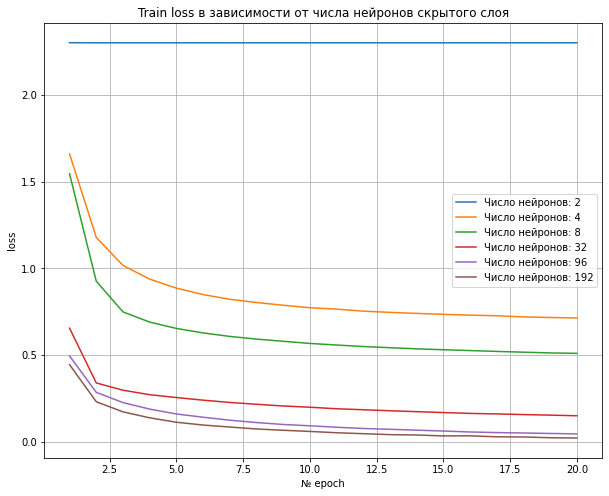

In [281]:
plt.figure(figsize=(10, 8))
for n_neur in res_dict:
        plt.plot(x, res_dict[n_neur]['loss'], label=f'Число нейронов: {n_neur}')
plt.legend(loc='best')
plt.grid()
plt.xlabel('№ epoch')
plt.ylabel('loss')
plt.title('Train loss в зависимости от числа нейронов скрытого слоя')
plt.show()

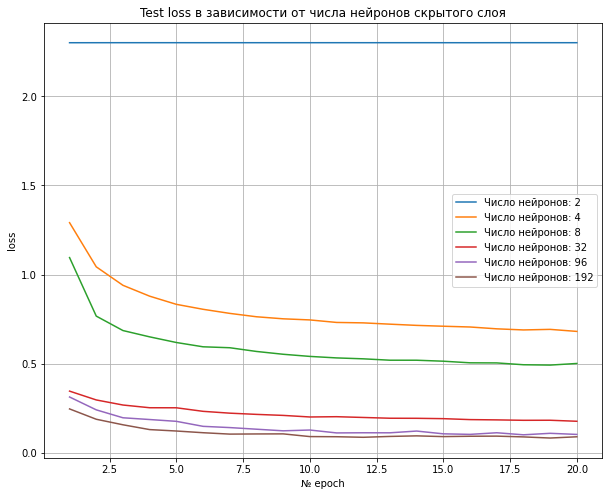

In [282]:
plt.figure(figsize=(10, 8))
for n_neur in res_dict:
        plt.plot(x, res_dict[n_neur]['val_loss'], label=f'Число нейронов: {n_neur}')
plt.legend(loc='best')
plt.grid()
plt.xlabel('№ epoch')
plt.ylabel('loss')
plt.title('Test loss в зависимости от числа нейронов скрытого слоя')
plt.show()

In [283]:
# res_dict[2]['accuracy'][19]

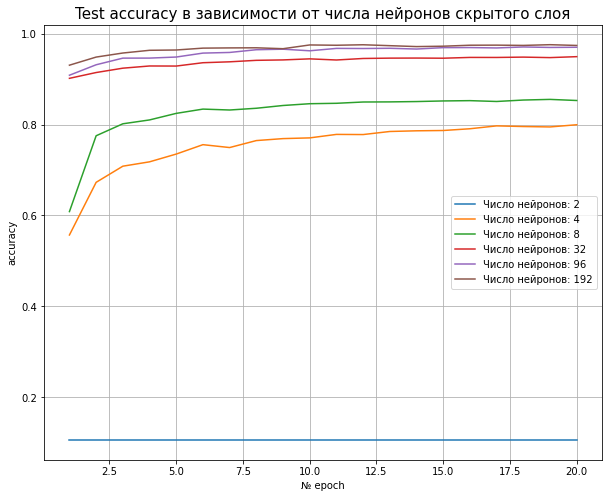

In [284]:
plt.figure(figsize=(10, 8))
for n_neur in res_dict:
        plt.plot(x, res_dict[n_neur]['val_accuracy'], label=f'Число нейронов: {n_neur}')
plt.legend(loc='best')
plt.grid()
plt.xlabel('№ epoch')
plt.ylabel('accuracy')
plt.title('Test accuracy в зависимости от числа нейронов скрытого слоя', size=15)
plt.show()

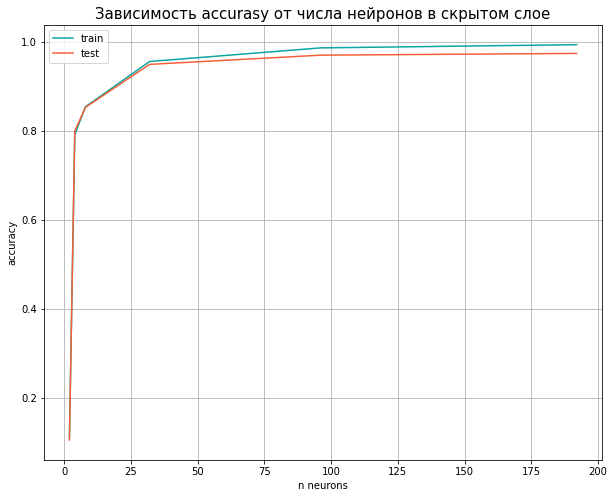

In [285]:
n_n = [2, 4, 8, 32, 96, 192]

res_train = [res_dict[n_neur]['accuracy'][19] for n_neur in res_dict]
res_test = [res_dict[n_neur]['val_accuracy'][19] for n_neur in res_dict]

plt.figure(figsize=(10, 8))
plt.plot(n_n, res_train, label='train', c='#0CA4A5')
plt.plot(n_n, res_test, label='test', c='#F46036')

plt.title('Зависимость accurasy от числа нейронов в скрытом слое', size=15)
plt.grid()
plt.xlabel('n neurons')
plt.ylabel('accuracy')
plt.legend()
plt.show()

Увеличение числа нейронов в скрытом слое двухслойной сети увеличивает качество модели. Впрочем, существует предел улучшения.

## **Провeрка обучения с разным количеством скрытых слоев**

In [286]:
# test_nn(train_images, train_labels, test_images, test_labels, n1_neuron=2)

In [287]:
# test_nn(train_images, train_labels, test_images, test_labels,
#                                    n1_neuron=32,
#                                    n2_neuron=32,
#                                    n_layers=3,
#                                    optimizer='adam',
#                                    n_epochs=20,
#                                    batch_size=32,
#                                    validation_split=0.2,
#                                    verbose=False)

In [288]:
# (2, 3, 5, 10) - кол-во слоев
res_dict_2 = {}
num_layers = (2, 3, 5, 10)
x = np.linspace(1, 20, 20)
for n in num_layers:
    res_dict_2[n] = test_nn(train_images, train_labels, test_images, test_labels,
                                   n1_neuron=32,
                                   n2_neuron=32,
                                   n_layers=n,
                                   optimizer='adam',
                                   n_epochs=20,
                                   batch_size=128,
                                   validation_split=0.2,
                                   verbose=False)

313/313 [==============================] - 1s 2ms/step - loss: 0.1255 - accuracy: 0.9628


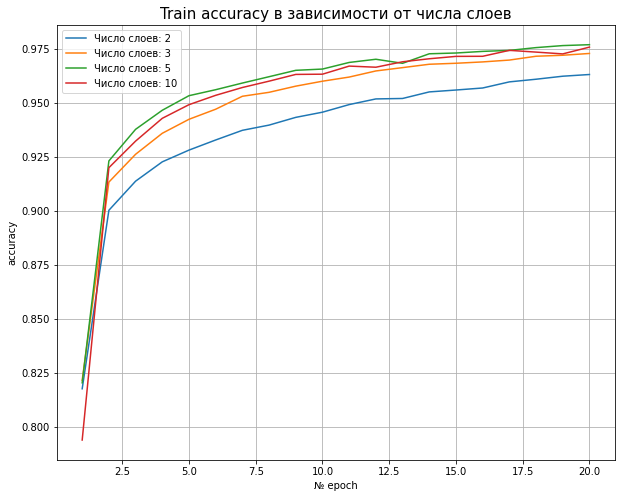

In [289]:
plt.figure(figsize=(10, 8))
for n_layers in res_dict_2:
        plt.plot(x, res_dict_2[n_layers]['accuracy'], label=f'Число слоев: {n_layers}')
plt.legend(loc='best')
plt.grid()
plt.xlabel('№ epoch')
plt.ylabel('accuracy')
plt.title('Train accuracy в зависимости от числа слоев', size=15)
plt.show()

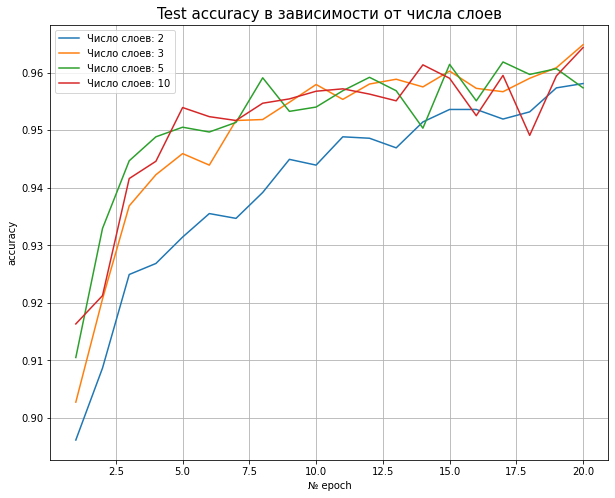

In [290]:
plt.figure(figsize=(10, 8))
for n_layers in res_dict_2:
        plt.plot(x, res_dict_2[n_layers]['val_accuracy'], label=f'Число слоев: {n_layers}')
plt.legend(loc='best')
plt.grid()
plt.xlabel('№ epoch')
plt.ylabel('accuracy')
plt.title('Test accuracy в зависимости от числа слоев',size=15)
plt.show()

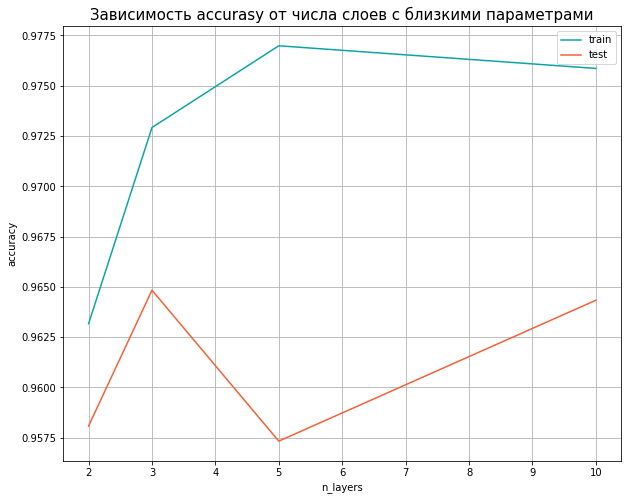

In [291]:
# n_layers = [2, 3, 5, 10]
res_train = [res_dict_2[n_lay]['accuracy'][19] for n_lay in res_dict_2]
res_test = [res_dict_2[n_lay]['val_accuracy'][19] for n_lay in res_dict_2]

plt.figure(figsize=(10, 8))
plt.plot(num_layers, res_train, label='train', c='#0CA4A5')
plt.plot(num_layers, res_test, label='test', c='#F46036')

plt.title('Зависимость accurasy от числа слоев с близкими параметрами', size=15)
plt.grid()
plt.xlabel('n_layers')
plt.ylabel('accuracy')
plt.legend()
plt.show()

При создании слоёв с одинаковыми параметрами лучше всего показала себя сеть с 5 слоями. Впрочем, и 3 и 10 слоёв также показали себя достаточно хорошо.

## Провeрка обучения с разными оптимизаторами
(Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1. Фиксируйте для тренировочного и тестового набора метрики accuracy.)

In [292]:
res_dict_3 = {}
optimizers = ['SGD', 'Adagrad', 'RMSprop', 'Adam', 'Nadam']
x = np.linspace(1, 20, 20)
for optim in optimizers:
    res_dict_3[optim] = test_nn(train_images, train_labels, test_images, test_labels,
                                   n1_neuron=32,
                                   n2_neuron=32,
                                   n_layers=3,
                                   optimizer=optim,
                                   n_epochs=20,
                                   batch_size=128,
                                   validation_split=0.2,
                                   verbose=False)

313/313 [==============================] - 1s 2ms/step - loss: 0.1210 - accuracy: 0.9658


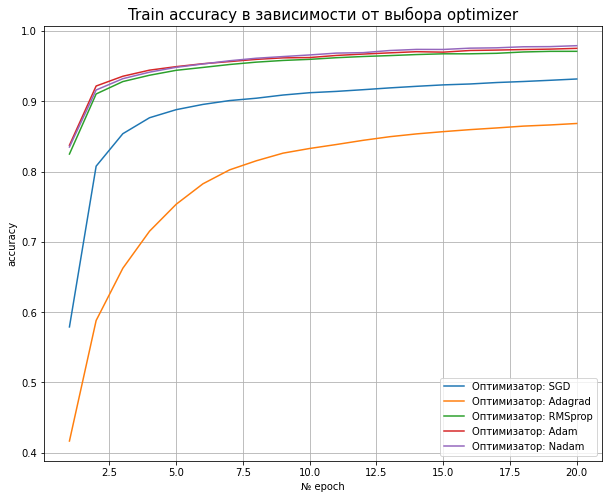

In [296]:
plt.figure(figsize=(10, 8))
for optim in res_dict_3:
        plt.plot(x, res_dict_3[optim]['accuracy'], label=f'Оптимизатор: {optim}')
plt.legend(loc='best')
plt.grid()
plt.xlabel('№ epoch')
plt.ylabel('accuracy')
plt.title('Train accuracy в зависимости от выбора optimizer', size=15)
plt.show()

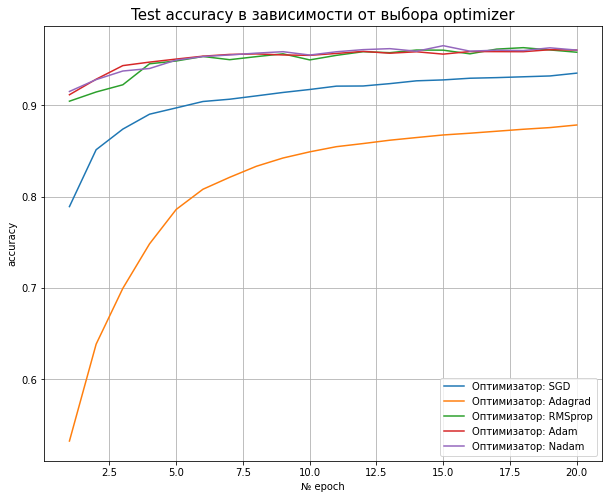

In [297]:
plt.figure(figsize=(10, 8))
for optim in res_dict_3:
        plt.plot(x, res_dict_3[optim]['val_accuracy'], label=f'Оптимизатор: {optim}')
plt.legend(loc='best')
plt.grid()
plt.xlabel('№ epoch')
plt.ylabel('accuracy')
plt.title('Test accuracy в зависимости от выбора optimizer', size=15)
plt.show()

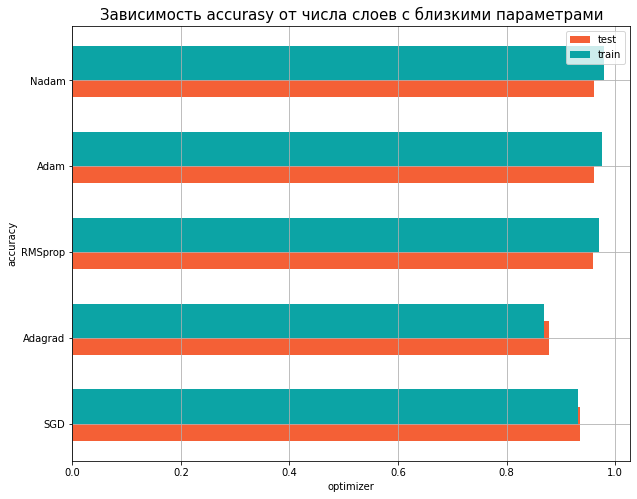

In [298]:
# optimizers = ['SGD', 'Adagrad', 'RMSprop', 'Adam', 'Nadam']
res_train = [res_dict_3[optim]['accuracy'][19] for optim in res_dict_3]
res_test = [res_dict_3[optim]['val_accuracy'][19] for optim in res_dict_3]

plt.figure(figsize=(10, 8))

plt.barh(optimizers, res_test, label='test', color='#F46036', height=0.4)
plt.barh(optimizers, res_train, label='train', color='#0CA4A5', height=0.4, align='edge')

plt.title('Зависимость accurasy от числа слоев с близкими параметрами', size=15)
plt.grid()
plt.xlabel('optimizer')
plt.ylabel('accuracy')
plt.legend()
plt.show()

Хуже всего показали себя оптимизаторы adagrad и sgd. Остальные показали примерно равные результаты.


In [306]:
model_fin = Sequential([
    Dense(96, input_shape=(28 * 28,), activation='tanh'),
    Dense(96, activation='tanh'),
    Dense(10, activation='softmax')
])
model_fin.compile(loss='categorical_crossentropy', 
                optimizer='Adam', 
                metrics=['accuracy'])

mod = model_fin.fit(train_images, to_categorical(train_labels),
                  epochs=20,
                  batch_size=128, 
                  verbose=0,
                  validation_split=0.2)

mod.history

{'loss': [0.4282366633415222,
  0.21425282955169678,
  0.15363278985023499,
  0.11963898688554764,
  0.100593201816082,
  0.08516828715801239,
  0.07291436940431595,
  0.06547538191080093,
  0.0549304336309433,
  0.05051487684249878,
  0.04544276371598244,
  0.03866227716207504,
  0.03435048460960388,
  0.030895214527845383,
  0.027330055832862854,
  0.026739582419395447,
  0.025149736553430557,
  0.019861146807670593,
  0.018606625497341156,
  0.017084887251257896],
 'accuracy': [0.875291645526886,
  0.9353333115577698,
  0.9539999961853027,
  0.9644374847412109,
  0.9695208072662354,
  0.9741041660308838,
  0.9778541922569275,
  0.9791666865348816,
  0.9825624823570251,
  0.9843958616256714,
  0.9856041669845581,
  0.9882916808128357,
  0.9893333315849304,
  0.9904375076293945,
  0.9915000200271606,
  0.9914374947547913,
  0.992062509059906,
  0.9939791560173035,
  0.9947500228881836,
  0.9951249957084656],
 'val_loss': [0.2413775622844696,
  0.1782664805650711,
  0.13539709150791168

In [308]:
print(f"Метрика на train: {max(mod.history['accuracy'])}", 
      f"Метрика на test: {max(mod.history['val_accuracy'])}", sep="\n")

Метрика на train: 0.9951249957084656
Метрика на test: 0.9745000004768372


In [313]:
N = 5
y_pred = model_fin.predict(test_images)
y_pred_class = np.argmax(y_pred, axis=1)

313/313 [==============================] - 1s 2ms/step


In [314]:
y_test = to_categorical(test_labels)

In [315]:
y_test_labels = np.argmax(y_test, axis=1)

In [316]:
test_confusion_matrix = confusion_matrix(y_test_labels, y_pred_class)
print(test_confusion_matrix)

[[ 966    1    2    0    0    2    5    1    2    1]
 [   0 1129    1    2    0    0    0    1    2    0]
 [   4    5 1004    2    1    0    4    5    6    1]
 [   0    2    8  978    0   12    0    4    5    1]
 [   0    4    1    0  966    0    6    1    2    2]
 [   5    0    0    3    2  868    7    1    5    1]
 [   4    5    2    0    3    4  939    0    1    0]
 [   1   27    9    1    5    0    1  979    2    3]
 [   2    0    5    3    2    4    2    4  951    1]
 [   3    6    1    6   26    7    1    5    8  946]]


In [317]:
print(classification_report(y_test_labels, y_pred_class))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.96      0.99      0.98      1135
           2       0.97      0.97      0.97      1032
           3       0.98      0.97      0.98      1010
           4       0.96      0.98      0.97       982
           5       0.97      0.97      0.97       892
           6       0.97      0.98      0.98       958
           7       0.98      0.95      0.97      1028
           8       0.97      0.98      0.97       974
           9       0.99      0.94      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



# Задание 2.

Используем набор примеров fashion-MNIST

1) Опишите - какой результат нейросети получен в зависимости от:

* числа нейронов в слое (для 2-х слойной сети),

* числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых параметров).

* фиксируйте для тренировочного и тестового набора метрики accuracy.

In [159]:
from keras.datasets import fashion_mnist

In [320]:
(X_train, y_train_labels), (X_test, y_test_labels) = fashion_mnist.load_data()

print(X_train.shape, X_test.shape)
print(y_train_labels.shape)

(60000, 28, 28) (10000, 28, 28)
(60000,)


In [253]:
classes = {'0': 'T-shirt/top',
           '1': 'Trouser',
           '2': 'Pullover',
           '3': 'Dress',
           '4': 'Coat',
           '5': 'Sandal',
           '6': 'Shirt',
           '7': 'Sneaker',
           '8': 'Bag',
           '9': 'Ankle boot'}

Label is 3
Label is 3
Label is 7


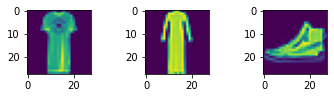

In [254]:
for i in range(3):
  ind = np.random.randint(0, X_train.shape[0])
  plt.subplot(330 + 1 + i)
  plt.imshow(X_train[ind])
  print(f'Label is {y_train_labels[ind]}')

In [319]:
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train.min(), X_train.max()

(-0.00196078431372549, 0.00196078431372549)

In [255]:
# Normalize the images.
X_train = (X_train / 255) *2 - 0.5
X_test = (X_test / 255) *2 - 0.5

print(X_train.min(), X_train.max())

# Flatten the images.
X_train = X_train.reshape((-1, 784))
X_test = X_test.reshape((-1, 784))

print(X_train.shape) # (60000, 784)
print(X_test.shape)

-0.5 0.5
(60000, 784)
(10000, 784)


## **Проверка обучения с разным количеством нейронов скрытого слоя**

In [256]:
res_dict_4={}
x = np.linspace(1, 20, 20)
for n_neurons in [2, 4, 8, 32, 96, 192]:
    res_dict_4[n_neurons] = test_nn(X_train, y_train_labels, X_test, y_test_labels,
                                   n1_neuron=n_neurons,
                                   n2_neuron=None,
                                   n_layers=2,
                                   optimizer='adam',
                                   n_epochs=20,
                                   batch_size=500,
                                   validation_split=0.2,
                                   verbose=False)

313/313 [==============================] - 1s 2ms/step - loss: 2.3440 - accuracy: 0.1036


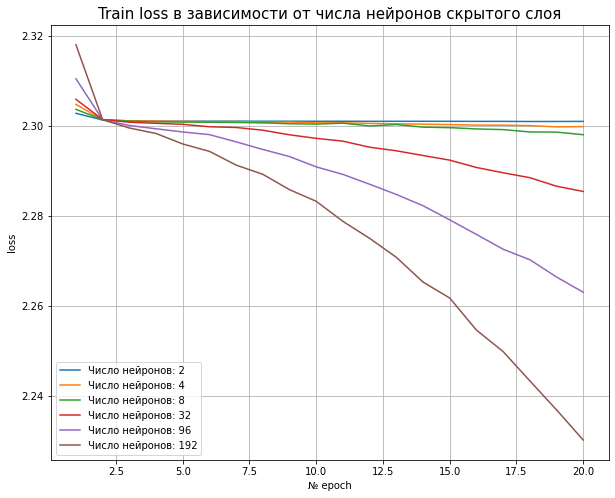

In [257]:
plt.figure(figsize=(10, 8))
for n_neur in res_dict_4:
        plt.plot(x, res_dict_4[n_neur]['loss'], label=f'Число нейронов: {n_neur}')
plt.legend(loc='best')
plt.grid()
plt.xlabel('№ epoch')
plt.ylabel('loss')
plt.title('Train loss в зависимости от числа нейронов скрытого слоя', size=15)
plt.show()

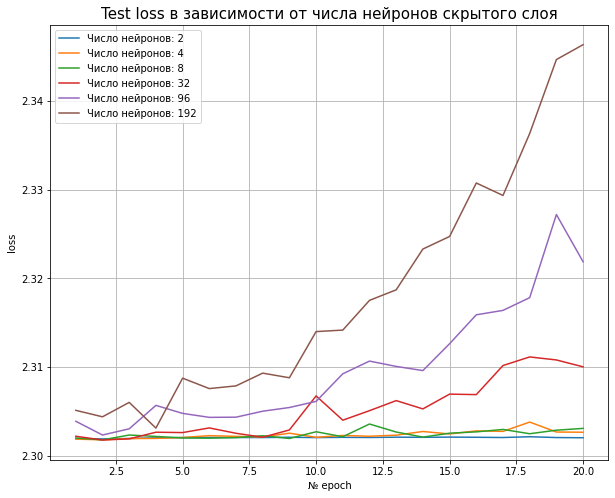

In [258]:
plt.figure(figsize=(10, 8))
for n_neur in res_dict_4:
        plt.plot(x, res_dict[n_neur]['val_loss'], label=f'Число нейронов: {n_neur}')
plt.legend(loc='best')
plt.grid()
plt.xlabel('№ epoch')
plt.ylabel('loss')
plt.title('Test loss в зависимости от числа нейронов скрытого слоя', size=15)
plt.show()

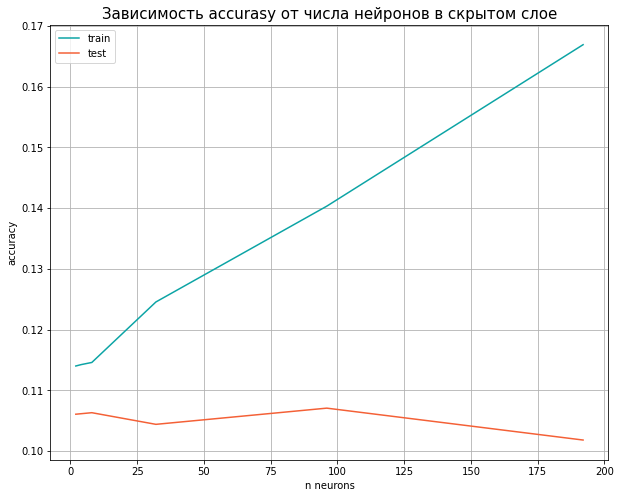

In [259]:
n_n = [2, 4, 8, 32, 96, 192]

res_train = [res_dict_4[n_neur]['accuracy'][19] for n_neur in res_dict_4]
res_test = [res_dict_4[n_neur]['val_accuracy'][19] for n_neur in res_dict_4]

plt.figure(figsize=(10, 8))
plt.plot(n_n, res_train, label='train', c='#0CA4A5')
plt.plot(n_n, res_test, label='test', c='#F46036')

plt.title('Зависимость accurasy от числа нейронов в скрытом слое', size=15)
plt.grid()
plt.xlabel('n neurons')
plt.ylabel('accuracy')
plt.legend()
plt.show()

## **Проверка обучения с разным количеством нейронов скрытого слоя**

In [260]:
# (2, 3, 5, 10) - кол-во слоев
res_dict_5 = {}
num_layers = (2, 3, 5, 10)
x = np.linspace(1, 20, 20)
for n in num_layers:
    res_dict_5[n] = test_nn(X_train, y_train_labels, X_test, y_test_labels,
                                   n1_neuron=32,
                                   n2_neuron=32,
                                   n_layers=n,
                                   optimizer='adam',
                                   n_epochs=20,
                                   batch_size=128,
                                   validation_split=0.2,
                                   verbose=False)

313/313 [==============================] - 1s 3ms/step - loss: 2.3022 - accuracy: 0.1119


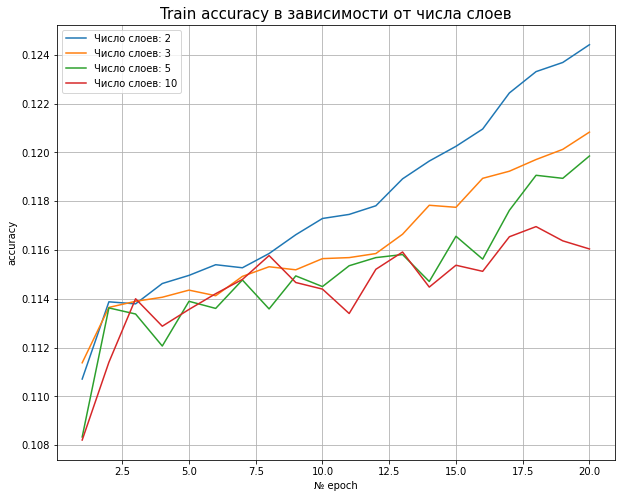

In [261]:
plt.figure(figsize=(10, 8))
for n_layers in res_dict_5:
        plt.plot(x, res_dict_5[n_layers]['accuracy'], label=f'Число слоев: {n_layers}')
plt.legend(loc='best')
plt.grid()
plt.xlabel('№ epoch')
plt.ylabel('accuracy')
plt.title('Train accuracy в зависимости от числа слоев', size=15)
plt.show()

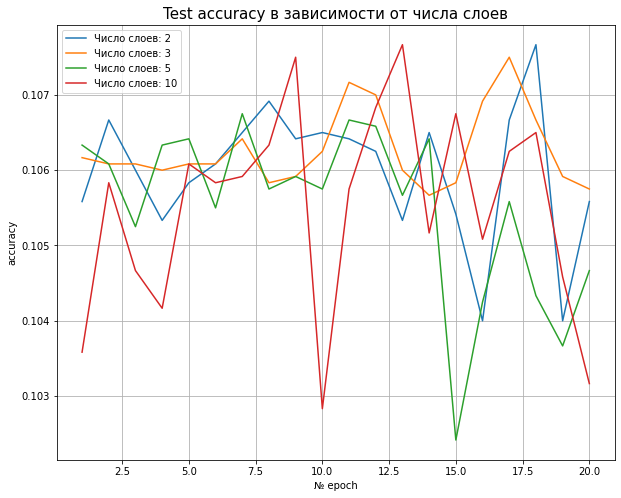

In [262]:
plt.figure(figsize=(10, 8))
for n_layers in res_dict_5:
        plt.plot(x, res_dict_5[n_layers]['val_accuracy'], label=f'Число слоев: {n_layers}')
plt.legend(loc='best')
plt.grid()
plt.xlabel('№ epoch')
plt.ylabel('accuracy')
plt.title('Test accuracy в зависимости от числа слоев', size=15)
plt.show()

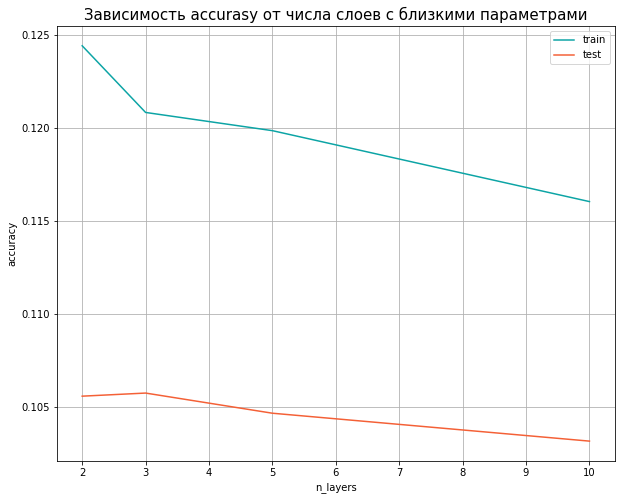

In [263]:
res_train = [res_dict_5[n_lay]['accuracy'][19] for n_lay in res_dict_5]
res_test = [res_dict_5[n_lay]['val_accuracy'][19] for n_lay in res_dict_5]

plt.figure(figsize=(10, 8))
plt.plot(num_layers, res_train, label='train', c='#0CA4A5')
plt.plot(num_layers, res_test, label='test', c='#F46036')

plt.title('Зависимость accurasy от числа слоев с близкими параметрами', size=15)
plt.grid()
plt.xlabel('n_layers')
plt.ylabel('accuracy')
plt.legend()
plt.show()

2) Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1. Фиксируйте для тренировочного и тестового набора метрики accuracy.

In [264]:
res_dict_6 = {}
optimizers = ['SGD', 'Adagrad', 'RMSprop', 'Adam', 'Nadam']
x = np.linspace(1, 20, 20)
for optim in optimizers:
    res_dict_6[optim] = test_nn(X_train, y_train_labels, X_test, y_test_labels,
                                   n1_neuron=32,
                                   n2_neuron=32,
                                   n_layers=3,
                                   optimizer=optim,
                                   n_epochs=20,
                                   batch_size=128,
                                   validation_split=0.2,
                                   verbose=False)

313/313 [==============================] - 1s 2ms/step - loss: 2.3157 - accuracy: 0.1118


In [ ]:
plt.figure(figsize=(10, 8))
for optim in res_dict_6:
        plt.plot(x, res_dict_6[optim]['accuracy'], label=f'Оптимизатор: {optim}')
plt.legend(loc='best')
plt.grid()
plt.xlabel('№ epoch')
plt.ylabel('accuracy')
plt.title('Train accuracy в зависимости от выбора optimizer', size=15)
plt.show()

In [ ]:
# optimizers = ['SGD', 'Adagrad', 'RMSprop', 'Adam', 'Nadam']
res_train = [res_dict_6[optim]['accuracy'][19] for optim in res_dict_6]
res_test = [res_dict_6[optim]['val_accuracy'][19] for optim in res_dict_6]

plt.figure(figsize=(10, 8))

plt.barh(optimizers, res_test, label='test', color='#F46036', height=0.4)
plt.barh(optimizers, res_train, label='train', color='#0CA4A5', height=0.4, align='edge')

plt.title('Зависимость accurasy от числа слоев с близкими параметрами', size=15)
plt.grid()
plt.xlabel('optimizer')
plt.ylabel('accuracy')
plt.legend()
plt.show()

3) Сделайте вывод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе?

Увеличение числа нейронов, выбор оптимизатора, увеличение числа эпох. Также существует зависимость от размера батчей.

4) Для одного варианта сети сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота, точность).

In [ ]:
model_fin_2 = Sequential([
    Dense(96, input_shape=(28 * 28,), activation='tanh'),
    Dense(96, activation='tanh'),
    Dense(10, activation='softmax')
])
model_fin_2.compile(loss='categorical_crossentropy', 
                optimizer='Adam', 
                metrics=['accuracy'])

mod_2 = model_fin_2.fit(X_train, to_categorical(y_train_labels),
                  epochs=20,
                  batch_size=128, 
                  verbose=0,
                  validation_split=0.2)

mod_2.history

In [ ]:
print(f"Метрика на train: {max(mod_2.history['accuracy'])}", 
      f"Метрика на test: {max(mod_2.history['val_accuracy'])}", sep="\n")

In [ ]:
N = 5
y_pred_2 = model_fin_2.predict(X_train)
y_pred_class_2 = np.argmax(y_pred_2, axis=1)

In [ ]:
y_test_2 = to_categorical(y_test_labels)

In [ ]:
y_test_labels_2 = np.argmax(y_test_2, axis=1)

In [ ]:
test_confusion_matrix = confusion_matrix(y_test_labels_2, y_pred_class_2)
print(test_confusion_matrix)

In [ ]:
print(classification_report(y_test_labels_2, y_pred_class_2))